In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from scipy.spatial.distance import sqeuclidean
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering



In [16]:
# matplotlib defaults
from google.colab import drive
drive.mount('/content/drive')

rainfall = pd.read_csv('/content/drive/MyDrive/UniTS/CodeProjects/Unsupervised_Learning/data/seasonal_rainfall_agg.csv')
rainfall

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,loc_id,latitude,longitude,MAM,JJA,SON
0,0,0,3.0,33.0,27.610630,31.365070,24.972204
1,1,1,3.0,33.5,26.281088,31.178913,20.268501
2,2,2,3.0,34.0,23.993891,29.477806,16.252021
3,3,3,3.0,34.5,21.138449,24.985073,13.394888
4,4,4,3.0,35.0,16.771113,17.162890,9.135349
...,...,...,...,...,...,...,...
770,770,770,15.0,46.0,2.395008,1.058037,0.294778
771,771,771,15.0,46.5,1.472659,1.153102,0.325222
772,772,772,15.0,47.0,1.785098,3.216337,1.181444
773,773,773,15.0,47.5,2.379334,3.724557,1.564208


In [8]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/seasonal_rainfall_agg.csv'
rainfall = pd.read_csv(file_path)
rainfall

In [33]:
X2 = np.array(rainfall[['SON', 'JJA']])[:100]
y2 = np.ones(X2.shape[0], dtype=int)[:100]

In [36]:
class HierarchicalAgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

    @staticmethod
    def _ward_distance(c1, c2):
        n1, n2 = len(c1), len(c2)
        c1_mean, c2_mean = np.mean(c1, axis=0), np.mean(c2, axis=0)
        sqeuclidean_dist = sqeuclidean(c1_mean, c2_mean)

        return (n1 * n2) / (n1 + n2) * sqeuclidean_dist

    @staticmethod
    def _update_labels(labels, min_cdist_idxs):
        # assign a cluster number to labels
        labels[labels == min_cdist_idxs[1]] = min_cdist_idxs[0]
        labels[labels > min_cdist_idxs[1]] -= 1

        return labels

    def fit_predict(self, X):
        labels = np.arange(len(X))
        clusters = [[x] for x in X]

        while len(clusters) > self.n_clusters:
            min_cdist, min_cdist_idxs = np.inf, []

            for i in range(len(clusters) - 1):
                for j in range(i + 1, len(clusters)):
                    cdist = self._ward_distance(clusters[i], clusters[j])

                    if cdist < min_cdist:
                        min_cdist = cdist
                        min_cdist_idxs = (i, j)

            labels = self._update_labels(labels, min_cdist_idxs)
            clusters[min_cdist_idxs[0]].extend(clusters.pop(min_cdist_idxs[1]))

        return np.array(labels)

In [ ]:
X2 = X2 - np.mean(X2,axis=0)

In [21]:
X2, y2 = make_blobs(n_samples=75, n_features=2, centers=5, random_state=0)

In [23]:
ac = HierarchicalAgglomerativeClustering(n_clusters=3)
ac_pred_res = ac.fit_predict(X2)
ac_ari = adjusted_rand_score(y2, ac_pred_res)
print(f'Adjusted Rand Score for AgglomerativeClustering: {ac_ari}', '', sep='\n')
print('prediction', ac_pred_res, sep='\n')
print('before prediction', y2, sep='\n')
y2 = ac_pred_res

Adjusted Rand Score for AgglomerativeClustering: 0.43110310444509614

prediction
[0 1 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 0 1 0 2 2 1 1 1 0 0
 0 0 0 1 0 0 0 2 0 2 2 0 2 0 0 1 0 2 0 0 0 2 1 0 0 1 0 1 2 0 0 0 2 0 1 0 0
 1]
before prediction
[0 3 4 3 2 4 0 2 0 4 2 4 2 2 0 0 0 3 2 0 2 2 2 3 4 1 1 2 3 0 4 4 3 3 3 2 2
 0 1 1 3 1 0 2 4 1 4 4 0 4 1 0 3 0 4 1 2 1 4 3 1 1 3 0 3 4 1 2 1 4 0 3 1 1
 3]


In [40]:
n_clusters = 5

def _update_labels(labels, min_cdist_idxs):
  # assign a cluster number to labels
  labels[labels == min_cdist_idxs[1]] = min_cdist_idxs[0]
  labels[labels > min_cdist_idxs[1]] -= 1

  return labels

X = X2

labels = np.arange(len(X))
clusters = [[x] for x in X]

while len(clusters) > n_clusters:
    min_cdist, min_cdist_idxs = np.inf, []

    for i in range(len(clusters) - 1):
        for j in range(i + 1, len(clusters)):

            n1, n2 = len(clusters[i]), len(clusters[j])
            c1_mean, c2_mean = np.mean(clusters[i], axis=0), np.mean(clusters[j], axis=0)
            sqeuclidean_dist = sqeuclidean(c1_mean, c2_mean)

            cdist =  (n1 * n2) / (n1 + n2) * sqeuclidean_dist

            if cdist < min_cdist:
                min_cdist = cdist
                min_cdist_idxs = (i, j)

    labels = _update_labels(labels, min_cdist_idxs)
    clusters[min_cdist_idxs[0]].extend(clusters.pop(min_cdist_idxs[1]))

ac_pred_res = np.array(labels)

y2 = ac_pred_res

# ac_ari = adjusted_rand_score(y2, ac_pred_res)
# print(f'Adjusted Rand Score for AgglomerativeClustering: {ac_ari}', '', sep='\n')
print('prediction', ac_pred_res, sep='\n')
# print('before prediction', y2, sep='\n')


prediction
[0 0 0 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 0 0 0 1 4 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 0 0 0 4 4 4 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 1 4 4 4 2]


In [41]:
sk_ac = AgglomerativeClustering(n_clusters=5, linkage='ward')
sk_ac_pred_res = sk_ac.fit_predict(X2)
sk_ac_ari = adjusted_rand_score(y2, sk_ac_pred_res)
print(f'Adjusted Rand Score for sk AgglomerativeClustering: {sk_ac_ari}', '', sep='\n')
print('prediction', sk_ac_pred_res, sep='\n')

Adjusted Rand Score for sk AgglomerativeClustering: 1.0

prediction
[1 1 1 3 3 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 1 1 1 3 4 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 1 1 1 4 4 4 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 4 4 4 2]


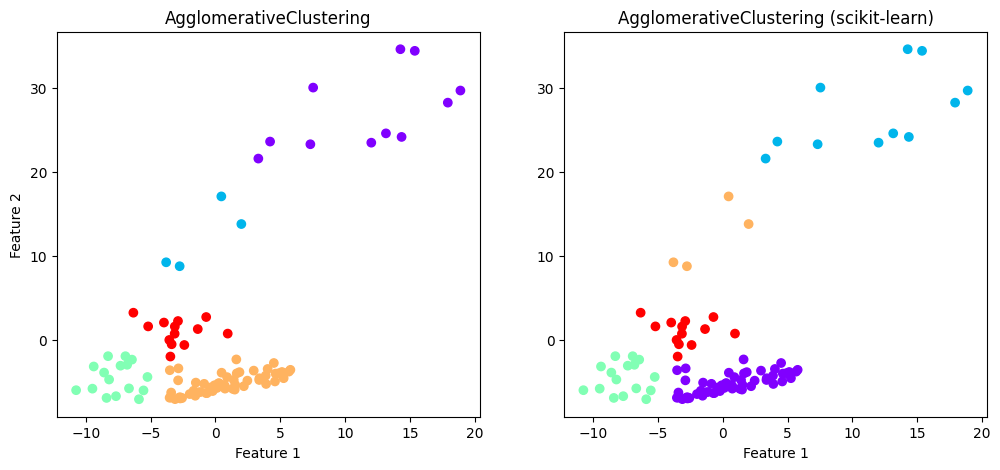

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=sk_ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

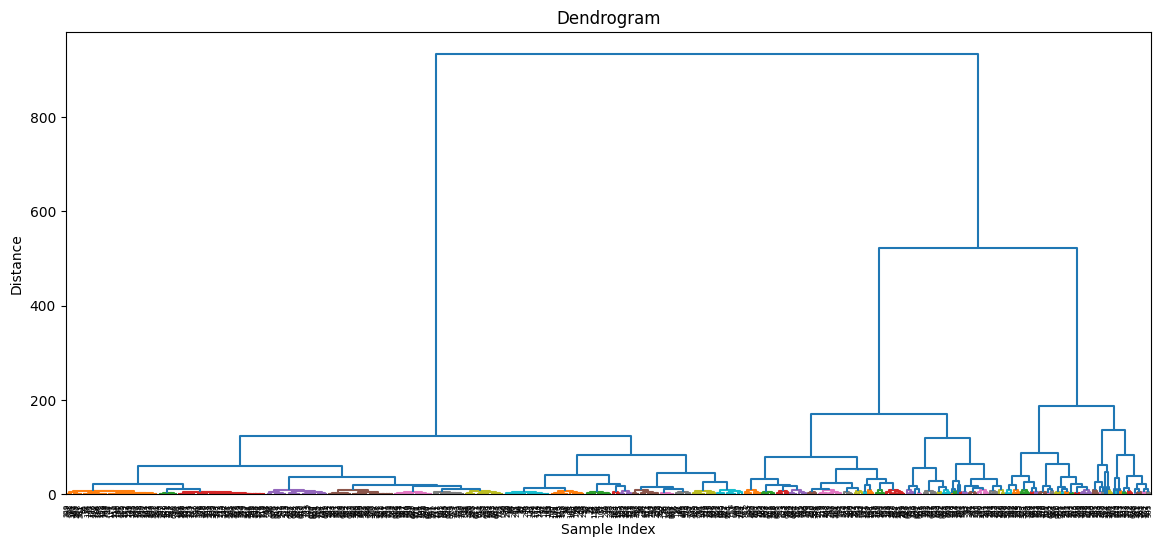

In [50]:
linkage_matrix = linkage(X2, method='ward', metric='euclidean')

plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()